In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
%matplotlib inline

Data Analysis

In [7]:
res = pd.read_csv('res.csv')

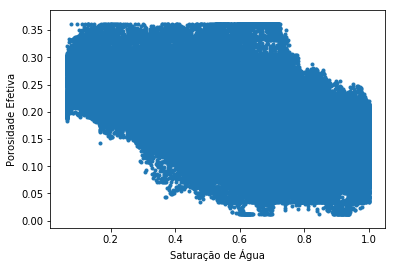

In [3]:
plt.scatter(res['SW'],res['phie'],marker=".")
plt.xlabel('Saturação de Água')
plt.ylabel('Porosidade Efetiva')
plt.show()

Gap Statistic

In [8]:
from sklearn.cluster import *
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [132]:
data0=preprocessing.scale(res[['SW','phie','GR','ILD','RHOB']])
data1=preprocessing.scale(res[['SW','phie']])

In [133]:
pca = PCA(n_components=3)
pca0 = pca.fit_transform(data0)

In [134]:
pca.explained_variance_ratio_

array([0.40744563, 0.19711813, 0.18891941])

In [135]:
np.sum(pca.explained_variance_ratio_)

0.7934831757051249

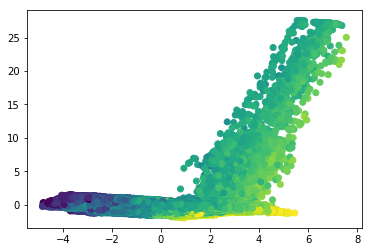

In [136]:
#plt.scatter(pca0.T[0],pca0.T[1])
plt.scatter(pca0.T[0],pca0.T[1],c=res['phie'])

In [43]:
def gap_stat(data,nrefs=10,maxk=10):
    st_k=[]
    ref_wcss=[]
    real_wcss=[]
    for k in tqdm(range(1,maxk)):
        ref_sum=np.zeros(data.shape)
        ref_std=[]
        for n in range(nrefs):
            temp_data = (np.random.random_sample(size=data.shape))
            ref_sum= ref_sum + temp_data
            ref_std.append(np.std(temp_data))
        ref_data = ref_sum / len(temp_data)
        stdk = np.mean(ref_std)
        st_k.append(np.sqrt(1+(1/nrefs))*stdk)
        
        kmeans = KMeans(k,init='k-means++')
        ref_k = kmeans.fit(ref_data)
        ref_wcss.append(ref_k.inertia_)
        
        real_k = kmeans.fit(data)
        real_wcss.append(real_k.inertia_)
        
    gapk = np.array(ref_wcss)-np.array(real_wcss)
        
    return gapk, st_k

In [47]:
[gap, sk] = gap_stat(data0)

In [142]:
kmeans = KMeans(5,init='k-means++')
new_data = res.copy()
new_data['Cluster0']=kmeans.fit_predict(pca0)
clusters0=new_data['Cluster0']

In [143]:
for i in new_data['Cluster0'].unique():
    print(i, len(new_data.loc[new_data['Cluster0'] == i]))

0 68933
2 171793
1 111018
4 115281
3 1194


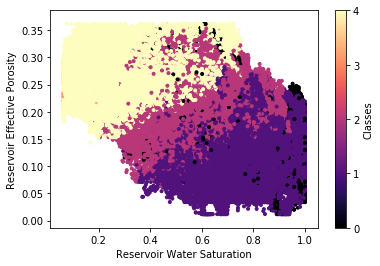

In [144]:
plt.scatter(res['SW'],res['phie'],c=new_data['Cluster0'],marker='.',cmap='magma')
plt.xlabel('Reservoir Water Saturation')
plt.ylabel('Reservoir Effective Porosity')
plt.colorbar(ticks=[0,1,2,3,4],spacing='uniform',label='Classes')
plt.show()

In [141]:
plt.scatter(res['SW'],res['phie'],c=new_data['Cluster1'],marker='.',cmap='magma')
plt.xlabel('Reservoir Water Saturation')
plt.ylabel('Reservoir Effective Porosity')
plt.colorbar(ticks=[0,1,2,3,4],spacing='uniform',label='Classes')
plt.show()

KeyError: 'Cluster1'

Text(0.5, 0, 'J célula - Inlines')

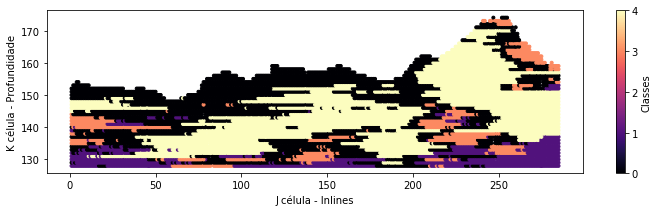

In [313]:
j_slice=int((np.max(new_data['j']))/2)
j_slice_data=new_data.loc[new_data['j'] == j_slice]
xplot = j_slice_data['i']
yplot = j_slice_data['k']
plt.figure(figsize=(12,3))
plt.scatter(xplot,yplot,c=j_slice_data['Cluster0'],marker='.',cmap='magma')
plt.colorbar(ticks=[0,1,2,3,4],spacing='uniform',label='Classes')
plt.ylabel('K célula - Profundidade')
plt.xlabel('J célula - Inlines')

Text(0.5, 0, 'I célula - Crosslines')

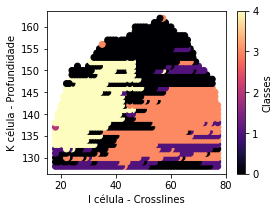

In [314]:
i_slice=int((np.max(new_data['i']))/2)
i_slice_data=new_data.loc[new_data['i'] == i_slice]
xplot = i_slice_data['j']
yplot = i_slice_data['k']
plt.figure(figsize=(4,3))
plt.scatter(xplot,yplot,c=i_slice_data['Cluster0'],cmap='magma')
plt.colorbar(ticks=[0,1,2,3,4],label='Classes')
plt.ylabel('K célula - Profundidade')
plt.xlabel('I célula - Crosslines')

Text(0.5, 0, 'Longitude')

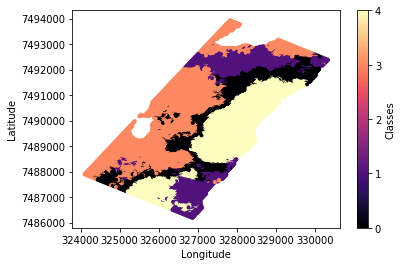

In [315]:
k_slice=int((np.median(new_data['k']))/1)
k_slice_data=new_data.loc[new_data['k'] == k_slice]
xplot = k_slice_data['X']
yplot = k_slice_data['Y']
plt.scatter(xplot,yplot,c=k_slice_data['Cluster0'],marker='.',cmap='magma')
plt.colorbar(ticks=[0,1,2,3,4],spacing='uniform',label='Classes')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

In [316]:
new_data.to_csv('cluster.csv')